## 1. Overview
Stored as pickle files, each of the batch files contains a dictionary with the following elements:

* data -- a 10000x1024 numpy array of uint8s. Each row of the array stores a 32x32 black and white image

* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.


The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

* label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above.  For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

In [1069]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name = "batches.meta"
data = pd.read_pickle(file_name)
data

{'num_cases_per_batch': 10000,
 'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_vis': 3072}

In [1070]:
file_name = "data_batch_1"
data = pd.read_pickle(file_name)
label1 = data[b'labels']
data1 = data[b'data']
#x=np.array(label1).reshape(10000)
#print(label1)
data1

array([[ 61,  44,  48, ..., 188, 124,  99],
       [171, 133, 103, ..., 136, 137, 137],
       [255, 252, 252, ...,  82,  82,  83],
       ...,
       [ 71,  62,  77, ...,  74,  76,  78],
       [253, 253, 219, ..., 212, 255, 254],
       [ 51,  51,  51, ..., 181, 181, 181]], dtype=uint8)

In [1071]:
file_name = "data_batch_2"
data = pd.read_pickle(file_name)
label2 = data[b'labels']
data2 = data[b'data']
#print(label2)
data2

array([[ 28,  22,  21, ..., 168, 167, 166],
       [ 16,  16,  14, ..., 151, 132,  84],
       [101, 102, 131, ...,  39, 111, 145],
       ...,
       [149, 161, 179, ..., 197, 192, 191],
       [184, 191, 198, ..., 173, 189, 195],
       [162, 160, 167, ..., 143, 149, 158]], dtype=uint8)

In [1072]:
file_name = "data_batch_3"
data = pd.read_pickle(file_name)
label3 = data[b'labels']
data3 = data[b'data']
#print(label3)
data3

array([[ 24,  16,  11, ...,  12,  11,  12],
       [ 85,  90,  84, ..., 165, 167, 138],
       [184, 162, 168, ..., 250, 250, 250],
       ...,
       [160, 190, 194, ..., 128,  68,  54],
       [ 24,  55,  62, ...,  66,  77,  80],
       [ 55,  33,  48, ..., 114, 107, 100]], dtype=uint8)

In [1073]:
file_name = "data_batch_4"
data = pd.read_pickle(file_name)
label4 = data[b'labels']
data4 = data[b'data']
#print(label4)
data4

array([[178, 178, 178, ...,  85,  87,  85],
       [ 35,  28,  31, ...,  25,  27,  26],
       [ 60,  54,  47, ..., 177, 174, 174],
       ...,
       [145, 139, 122, ..., 143, 153, 141],
       [ 72,  74,  75, ...,  49,  63,  52],
       [246, 247, 247, ..., 178, 171, 167]], dtype=uint8)

In [1074]:
file_name = "data_batch_5"
data = pd.read_pickle(file_name)
label5 = data[b'labels']
data5 = data[b'data']
#print(label5)
data5

array([[254, 251, 252, ..., 173, 231, 247],
       [142, 141, 142, ...,  85,  91,  95],
       [ 79,  40,   9, ...,  28,  25,  23],
       ...,
       [141, 142, 142, ...,  47,  38,  27],
       [207, 204, 203, ..., 185, 189, 189],
       [230, 237, 236, ..., 177, 163, 162]], dtype=uint8)

In [1075]:
file_name = "data_batch_6"
data = pd.read_pickle(file_name)
label6 = data[b'labels']
data6 = data[b'data']
#print(label6)
data6

array([[118, 118, 123, ...,  66,  73,  57],
       [235, 230, 232, ..., 177, 190, 195],
       [183, 181, 160, ...,   5,   4,   7],
       ...,
       [ 16,  15,  13, ...,  26,  27,  24],
       [ 32,  26,  33, ..., 109, 109, 107],
       [ 76, 102, 104, ..., 112,  65,  26]], dtype=uint8)

In [1076]:
combined_data=np.concatenate((data1,data2,data3,data4,data5,data5),axis=0)
combined_data.shape

(60000, 1024)

In [1077]:
combined_label=np.concatenate((label1,label2,label3,label4,label5,label6),axis=0)
combined_label.shape

(60000,)

In [1078]:
#for 1st batch 
#parameters
x_train = combined_data[:50000].T
y_train = np.array(combined_label[:50000]).reshape(1,-1)
x_test = combined_data[50000:].T
y_test = np.array(combined_label[50000:]).reshape(1,-1)
#x_train.shape= (1024, 50000)
#y_train.shape (1, 50000)
#x_test.shape (1024, 10000)

In [1079]:
#normalising the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = y_train.astype('float32')/9
y_test = y_test.astype('float32')/9


In [1080]:
#no. of training examples
m = x_train.shape[1]

In [1081]:
#hyperparameters
def init_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01 # (n_h, 1024)
    b1 = np.zeros((n_h, 1)) # (n_h, 1)

    w2 = np.random.randn(1, n_h)*0.01 # (1, 1000)
    b2 = np.zeros((n_y, 1)) # (1,1)
    
    return w1, b1, w2, b2

In [1082]:
def relu(z):
    return np.maximum(z, 0)

In [1083]:
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

In [1084]:
def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [1085]:
def forward_prop(x, w1, b1, w2, b2):
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
#     print("value of a1:", a1)
#     print("value of a2:", a2) [0., 0., 0., ....0.]
    
#     print("shape of a1",a1.shape) (n_h=100, 50000)
#     print("shape of a2",a2.shape) (w2.shape[0]=1, 50000)
    
    return a1, a2, z1

In [1086]:
def cost_func(a2, y):
    m = y.shape[1] # (50000)
    cost = -(1/m)*np.sum(y*np.log(a2))
    #print("cost: =",cost)
    return cost

In [1087]:
def back_prop(x, y, w1, b1, w2, b2, a1, a2, z1):
    dz2 = a2 - y # a2=(1, 50000), y=(1, 50000)
    #print("value of dz2", dz2)
    #print("shape of dz2:", dz2.shape) # (1,5000)
    
    dw2 = (1/m)*np.dot(dz2, a1.T)
    #print("value of dw2",dw2)
    #print("shape of dw2", dw2.shape)  #(1, n_h=100)
    
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    #print("value of db2", db2)
    #print("shape of db2", db2.shape) # (1,1)
    
    dz1 = np.dot(w2.T, dz2)*derivative_relu(z1) 
    #print("shape of dz1", dz1.shape) #(n_h=100, 50000)
    
    dw1 = (1/m)*np.dot(dz1, x.T)
    #print("shape of dw1", dw1.shape) #(n_h=100, 1024)
    
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)  
    #print("shape of db1", db1.shape) # (n_h=100, 1)
    
    return dw1, db1, dw2, db2

In [1088]:
def gradient_desc(w1, b1, w2, b2, learning_rate, dw1, db1, dw2, db2):
    w1 = w1 - learning_rate*dw1
    #print("w1", w1)
    #print("shape of w1", w1.shape) (n_h=100, 1024)
    
    b1 = b1 - learning_rate*db1
    #print("b1", b1)
    #print("shape of b1", b1.shape) (n_h=100,1)
    
    w2 = w2 - learning_rate*dw2
    #print("w2", w2)
    #print("shape of w2", w2.shape) (1, n_h=100)
    
    b2 = b2 - learning_rate*db2
    #print("b2", b2)
    #print("shape of b2", b2.shape) (1,1)
    
    return w1, b1, w2, b2

In [1089]:
def nn_model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    w1, b1, w2, b2 = init_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        a1, a2, z1 = forward_prop(x, w1, b1, w2, b2)
        cost = cost_func(a2, y)
        dw1, db1, dw2, db2 = back_prop(x, y, w1, b1, w2, b2, a1, a2, z1)
        w1 ,b1, w2, b2 = gradient_desc(w1, b1, w2, b2, learning_rate, dw1, db1, dw2, db2)
        cost_list.append(cost)
        
        #if((i/10)==0):
        print(i,": ", cost)
    #print("cost_list", cost_list)
    return w1, b1, w2, b2 , cost_list    

In [1090]:
learning_rate=0.02
iterations=10
n_h = 100 #changed from 1000 to 100
#w1, b1, w2, b2, cost_list = nn_model(x_train, y_train, learning_rate = learning_rate, iterations = iterations)
w1, b1, w2, b2, cost_list= nn_model(x_train, y_train, n_h, learning_rate = learning_rate, iterations = iterations)

0 :  5.409865091488733
1 :  5.409887412750779
2 :  5.409929950125736
3 :  5.4100131792970085
4 :  5.41016241932613
5 :  5.410411999888198
6 :  5.410826840947984
7 :  5.41152305714022
8 :  5.412702232841781
9 :  5.414714965572304


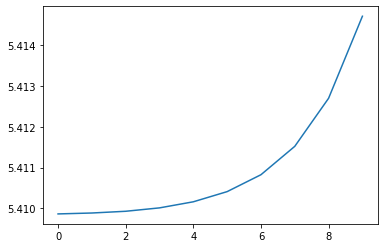

In [1091]:
t = np.arange(0, iterations)
plt.plot(t, cost_list)
plt.show()

In [1092]:
def accuracy(input_param, labels, w1, b1, w2, b2):
    a1, a2, z1 = forward_prop(input_param, w1, b1, w2, b2)    
    a2 = np.argmax(a2, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a2 == labels)*100
    
    return acc

In [1093]:
print("Accuracy of Train Dataset", accuracy(x_train, y_train, w1 ,b1, w2, b2), "%")
print("Accuracy of Test Dataset", round(accuracy(x_test, y_test, w1 ,b1, w2, b2), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 100.0 %
